In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('HousePricePrediction.xlsx')
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [6]:
data.shape

(2919, 13)

In [ ]:
#Our data has 2919 rows and 13 columns. means 2919 houses and 13 different details of each house

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
################ DATA CLEANING #####################

In [ ]:
#In out dataset we have Id variable which is of no importance for our analysis, so lets drop it.
data = data.drop(['Id'], axis=1)

In [30]:
#checking for null values and dropping if any
data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [28]:
#Dropping the null values if any 
data = data.dropna()

In [ ]:
##################### DATA ANALYSIS ##################################

In [ ]:
#From all the above variables of our dataset, we concluce that our TARGET VARIABLE is "SalePrice".
#Because SalePrice is dependent on other variables and they will help us decide the sale price of houses
#So we will analyse SalePrice with other variables for our prediction

Text(0, 0.5, 'Count')

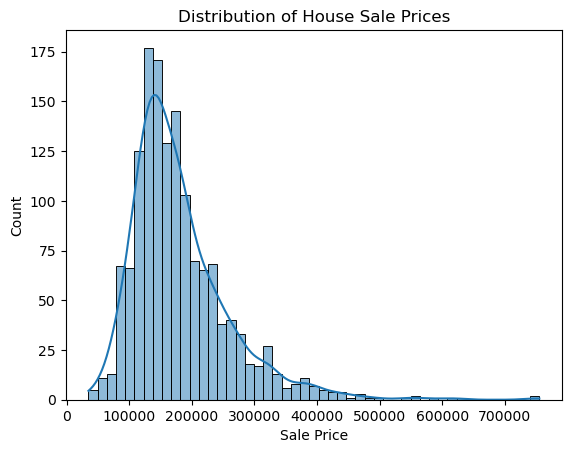

In [18]:
#Using histplot lets compare SalePrice with all other variables
sns.histplot(x='SalePrice', data=data, kde=True)
plt.title("Distribution of House Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Count")

In [ ]:
#We can see that we have more houses with sale price between 50000 to 350000 than the expensive high sale price houses

In [7]:
#The most important variable from our given dataset is LotArea which will help us decide the house price.
#So lets start comparing with LotArea first
data['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
2914     1936
2915     1894
2916    20000
2917    10441
2918     9627
Name: LotArea, Length: 2919, dtype: int64

Text(0.5, 1.0, 'Lot Area vs Sale Price')

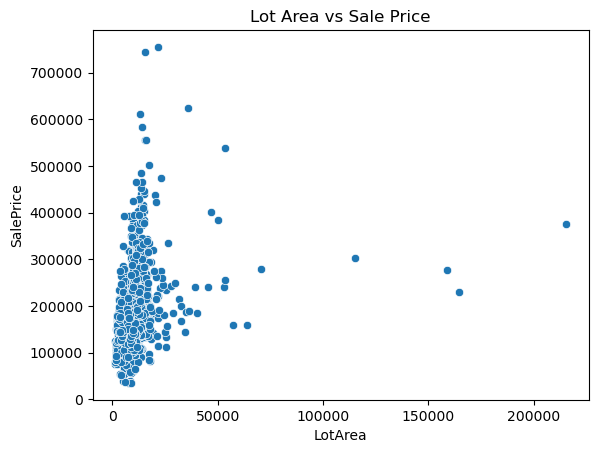

In [33]:
sns.scatterplot(x='LotArea', y='SalePrice', data=data)
plt.title("Lot Area vs Sale Price")

In [ ]:
#Here we have few outliers which have higher Lot area but not so high Sale Price

In [33]:
#As our LotArea variable is in numeric form, lets make categories of it for easy understanding
data['LotArea'].sort_values()

956       1300
2909      1470
1614      1476
2246      1477
1039      1477
         ...  
451      70761
706     115149
249     159000
335     164660
313     215245
Name: LotArea, Length: 2919, dtype: int64

<Axes: xlabel='LotArea_bin', ylabel='SalePrice'>

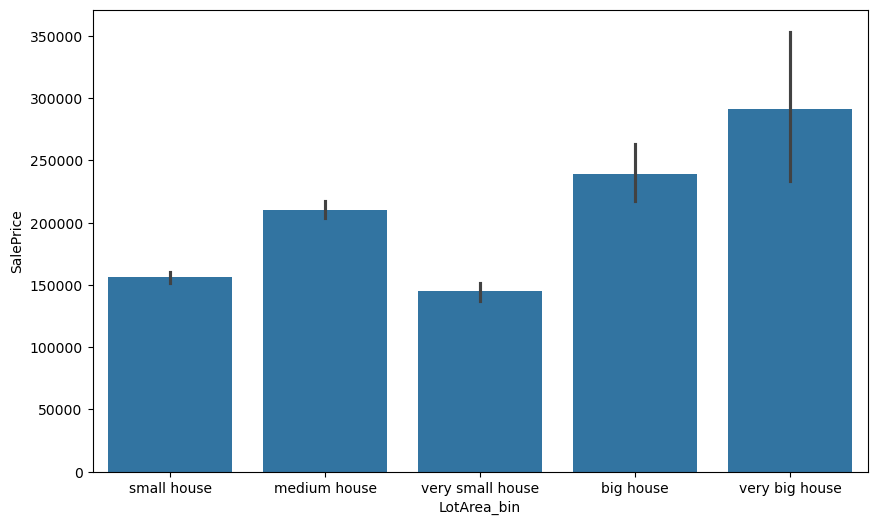

In [29]:
def cat_LotArea(x):
    if (x < 5000):
        return "very small house"
    elif (x >= 5000 and x<10000):
        return "small house"
    elif (x >=10000 and x<15000):
        return "medium house"
    elif (x>=15000 and x<50000):
        return "big house"
    elif (x>=50000):
        return "very big house"

data['LotArea_bin'] = data['LotArea'].apply(lambda x: cat_LotArea(x))
plt.figure(figsize=(10,6))
sns.barplot(x='LotArea_bin', y='SalePrice', data=data)

In [ ]:
#Here we can clearly see that as the Lot Area of houses increase, their Sale Price also increases

Text(0.5, 1.0, 'Overall Condition vs Sale Price')

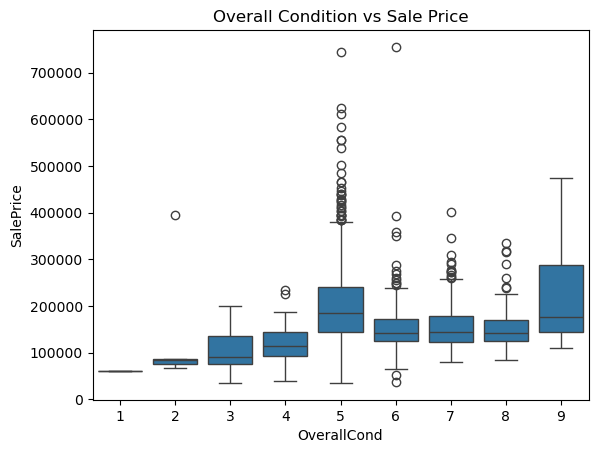

In [34]:
#Now lets compare SalePrice vs Overall Condition
sns.boxplot(x='OverallCond', y='SalePrice', data=data)
plt.title("Overall Condition vs Sale Price")

In [ ]:
#Here we see that houses with condition rating 5 and 9 have high sale price
#Also there are many outliers

Text(0.5, 1.0, 'Year Built vs Sale Price')

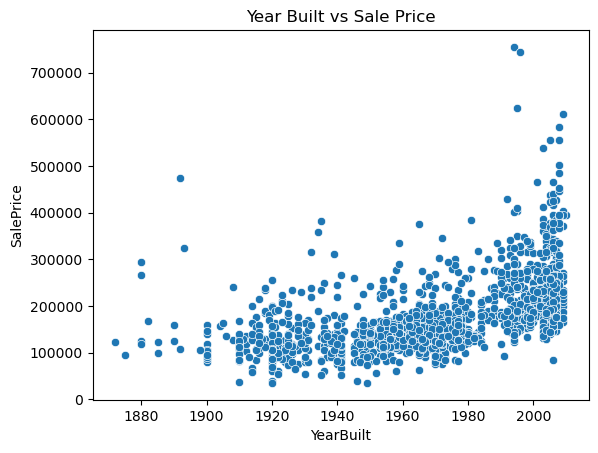

In [35]:
#Analysis for YearBuilt vs SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data)
plt.title("Year Built vs Sale Price")

In [ ]:
#Naturally, the newer houses have more sale price than the houses build earlier

Text(0.5, 1.0, 'Zoning Type vs Sale Price')

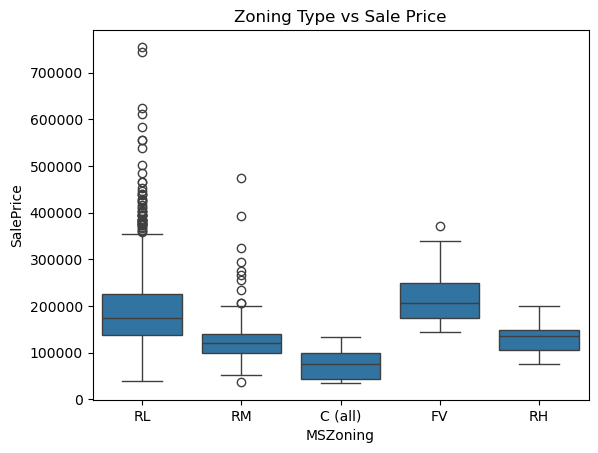

In [36]:
#Analyse for SalePrice by Zoning Area
sns.boxplot(x='MSZoning', y='SalePrice', data=data)
plt.title("Zoning Type vs Sale Price")

In [ ]:
#Here, houses in zones RL and FV have higher sale price

In [34]:
#Analyse for SalePrice by Exterior1st
data['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

<Axes: xlabel='Exterior1st', ylabel='SalePrice'>

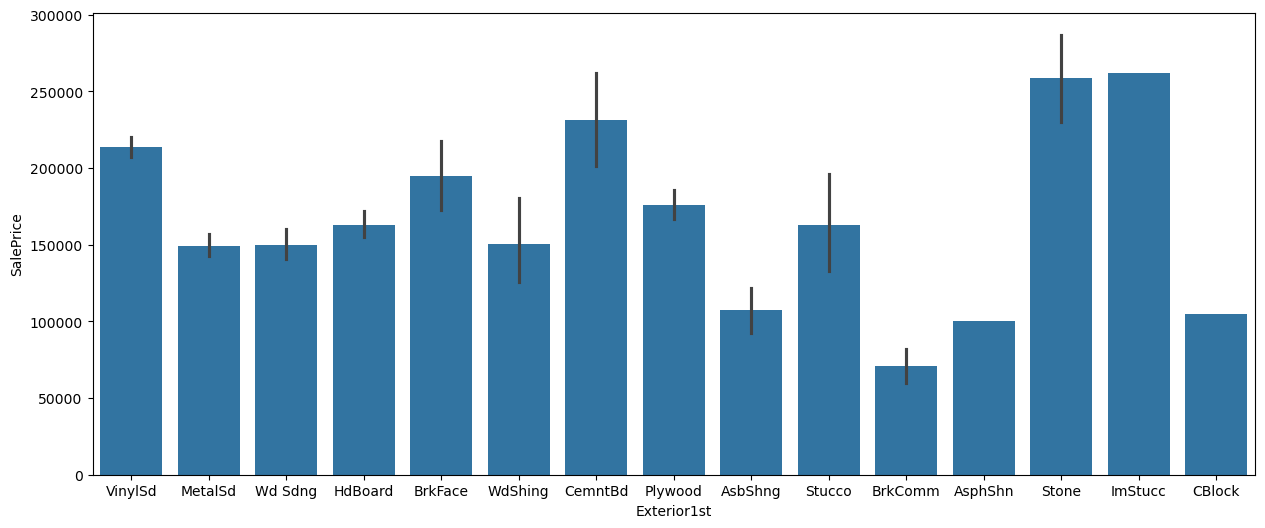

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x='Exterior1st', y='SalePrice', data=data)

In [ ]:
#Houses build with Stone, lmStucc, CemntBd, VinylSd have higher Sale Price

In [38]:
data['BldgType'].value_counts()

BldgType
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: count, dtype: int64

<Axes: xlabel='BldgType', ylabel='SalePrice'>

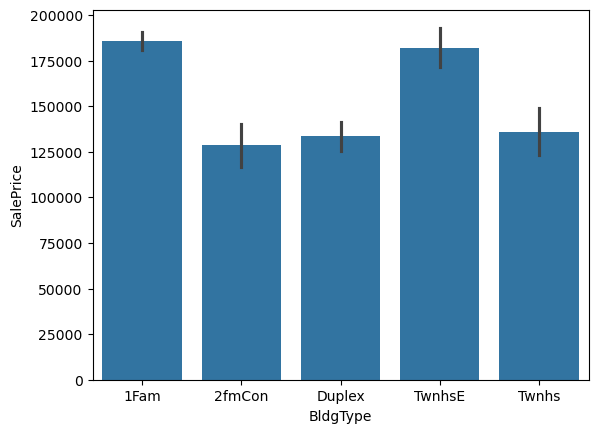

In [39]:
sns.barplot(x='BldgType', y='SalePrice', data=data)

In [ ]:
#TwnhsE and 1Fam have higher Sale price than other BldgType